#1. Causal Discovery 연습

In [ ]:
!pip install causal-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

- 제조 데이터 적용

In [24]:
import pandas as pd
data = pd.read_csv("sonar.csv")
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,1
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,1
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.010,0.018,0.024,0.032,0.016,0.010,0.008,1
3,0.010,0.017,0.062,0.020,0.020,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.008,0.007,0.005,0.004,0.004,0.012,1
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.010,0.011,0.002,0.007,0.005,0.011,0.009,1


In [29]:
cols = data.drop("y", axis=1).describe().iloc[2,:].sort_values(ascending=False)[0:20].index.tolist()

In [30]:
data = data[cols]

  0%|          | 0/20 [00:00<?, ?it/s]

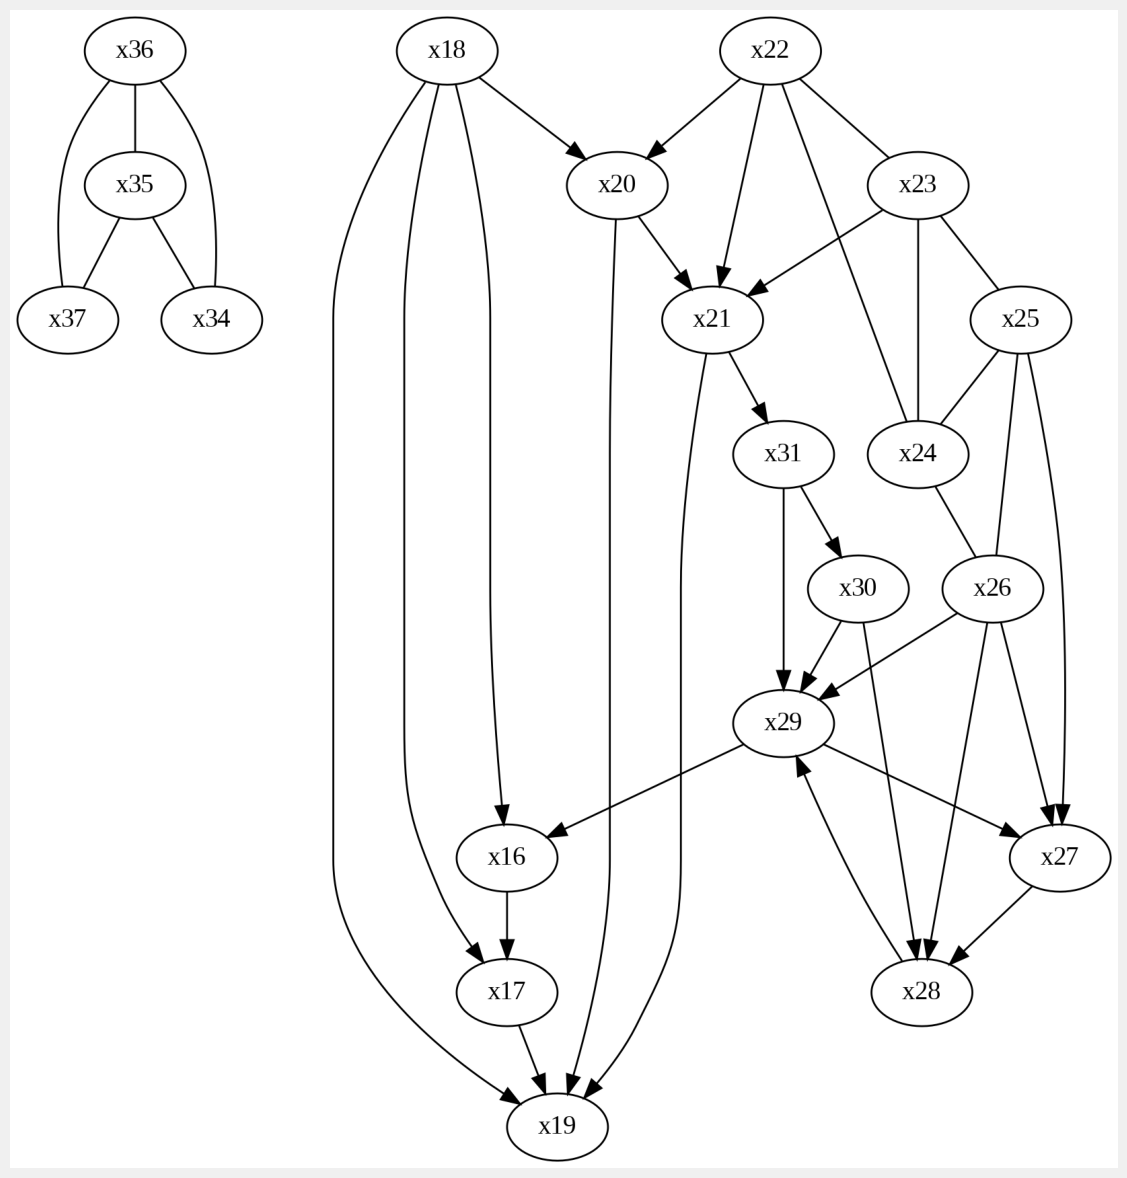

In [31]:
#PC 적
cg = pc(data.to_numpy())
pyd_np = GraphUtils.to_pydot(cg.G)
cg.draw_pydot_graph(labels=cols)

- LiNGAM적용

In [34]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.1 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=6fc6017163c263d47aa2d284bbe888e916db2c872f4bf85d937353ce7e41e7c4
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy
  Attempting uninstall: numpy
    F

In [3]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

In [7]:
import pandas as pd
data = pd.read_csv("sonar.csv")
print(data.y.value_counts())
cols = data.drop("y", axis=1).describe().iloc[2,:].sort_values(ascending=False)[0:20].index.tolist()
data = data[cols]

y
0    111
1     97
Name: count, dtype: int64


In [5]:
model = lingam.DirectLiNGAM()
model.fit(data[cols])

In [6]:
model.adjacency_matrix_

array([[ 0.   , -0.083,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.006,  0.   , -0.212,  0.   ,  0.658,  0.75 , -0.218,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.034,  0.   ,  0.   ],
       [ 0.   ,  0.853,  0.   ,  0.   ,  0.   ,  0.4  ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.045,
        -0.308,  0.   ,  0.   ,  0.   ],
       [ 0.772,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   , -0.04 , -0.274,  0.   ,  0.   ,  0.   ,
         0.   ,  0.516,  0.   ,  0.   ],
       [-0.207,  0.539,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.33 ,
   

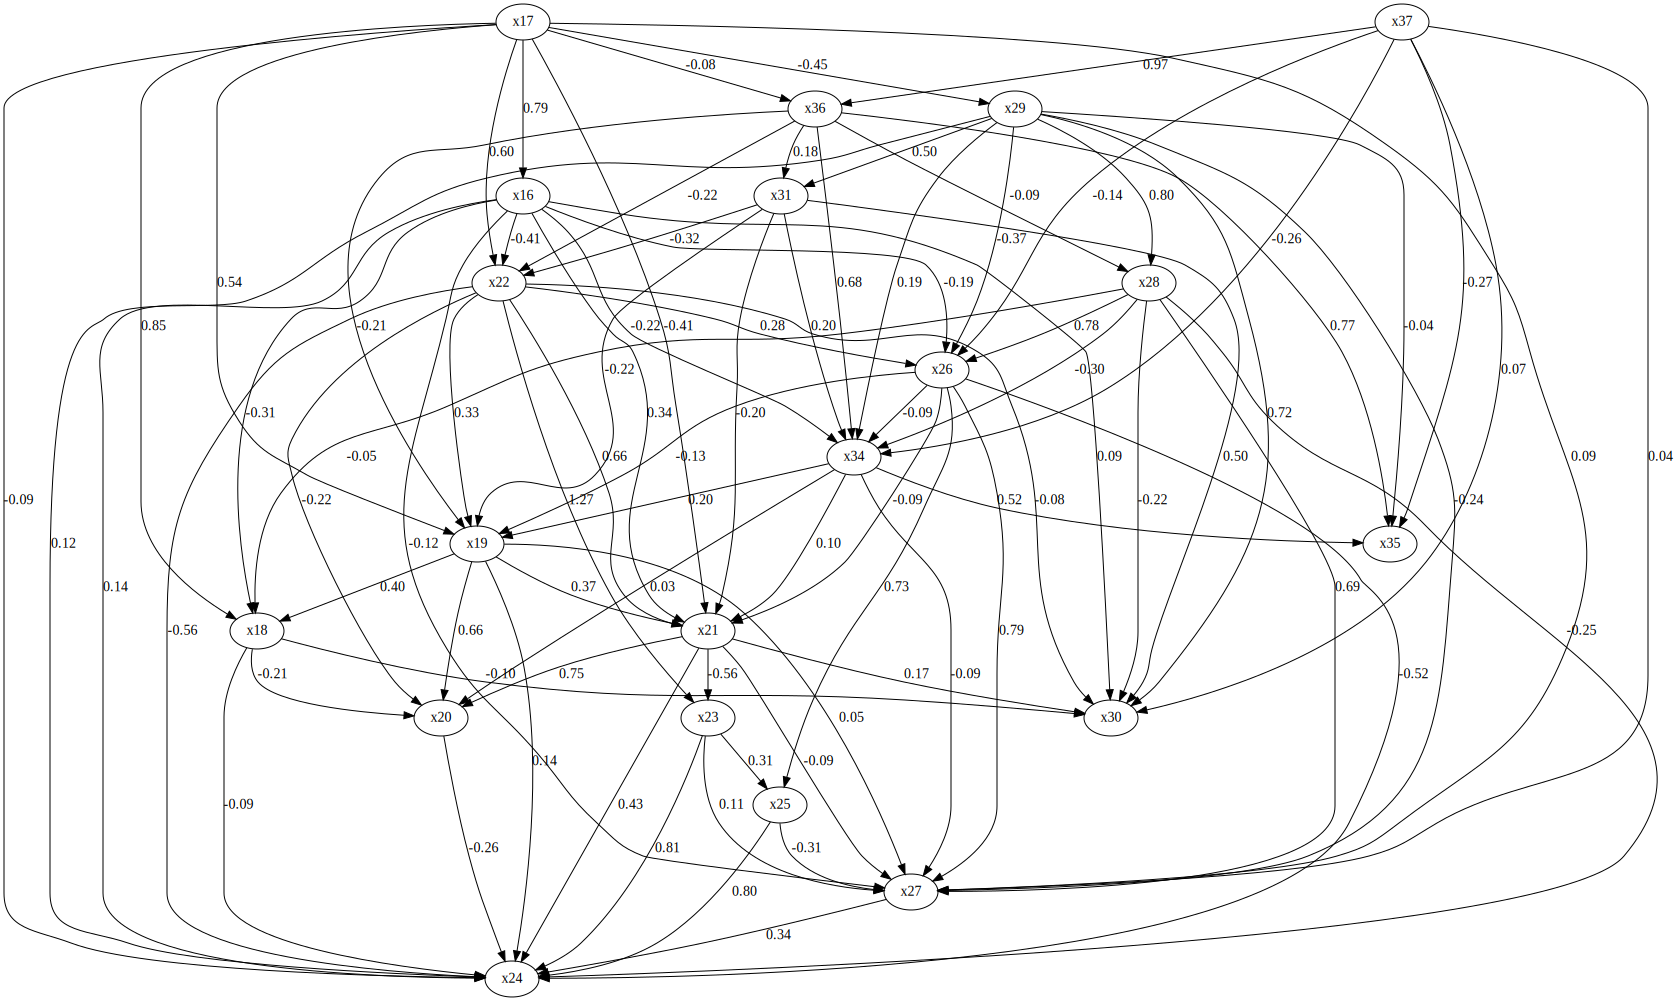

In [9]:
make_dot(model.adjacency_matrix_, labels=cols)

In [10]:
model.causal_order_

[12, 1, 0, 11, 19, 16, 7, 15, 14, 17, 5, 6, 3, 18, 2, 8, 10, 4, 9, 13]

In [23]:
for i in range(19):
  print( model.estimate_total_effect(data, 0, i) )

0.9999999999999996
-2.7252234969680556e-16
-0.2656622420936634
-0.058057897964855956
1.2006934660365916
-0.17608742989513512
-0.2495086185194163
-0.18419334812109092
-0.054436247611210256
-0.3704443739976052
-0.06535850624105594
-0.042976156428688385
-1.3710871411870433e-16
-0.032920600309984185
-0.1823998464208914
-0.22497878106750524
-0.015450548785900312
0.7968343828957799
0.08056764683980684


/usr/local/lib/python3.11/dist-packages/lingam/base.py:76: UserWarning: The estimated causal effect may be incorrect because the causal order of the destination variable (to_index=1) is earlier than the source variable (from_index=0).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lingam/base.py:76: UserWarning: The estimated causal effect may be incorrect because the causal order of the destination variable (to_index=12) is earlier than the source variable (from_index=0).
  warnings.warn(


#2.Meta-Learner 활용

In [24]:
!pip install xgboost causalml lightgbm

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from causalml.inference.meta import BaseTClassifier
from causalml.metrics import plot_gain, plot_qini
from causalml.metrics import auuc_score, qini_score

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import warnings

In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv("uplift_train.csv", index_col=[0])
clients = pd.read_csv("clients.csv", index_col=[0])
clients = clients[["age", "gender"]]

In [61]:
df1 = df.merge(clients, on='client_id')
df1.gender.value_counts()

,count
gender,
U,92832
F,73696
M,33511


In [62]:
df1.gender.replace({'U':0, 'F':1, 'M':2}, inplace=True)
df1.head()

/tmp/ipython-input-62-1066889675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.gender.replace({'U':0, 'F':1, 'M':2}, inplace=True)
/tmp/ipython-input-62-1066889675.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.gender.replace({'U':0, 'F':1, 'M':2}, inplace=True)


,treatment_flg,target,age,gender
client_id,,,,
000012768d,0,1,45,0
000036f903,1,1,72,1
00010925a5,1,1,83,0
0001f552b0,1,1,33,1
00020e7b18,1,1,73,0


In [41]:
confounding_col = ['age', 'gender']

In [64]:
from sklearn.model_selection import train_test_split
y = "target"
T = "treatment_flg"
X = confounding_col

X_train, X_test, y_train, y_test, trmt_train, trmt_testr = train_test_split( df1[X], df1[y], df1[T])

In [66]:
from causalml.inference.meta import XGBTRegressor

# Initialize and fit the T-Learner with XGBoost
learner_t = XGBTRegressor()
learner_t.fit(X=X_train, treatment=trmt_train, y=y_train)

# Predict the treatment effect and calculate the Average Treatment Effect (ATE)
treatment_effect = learner_t.predict(X=X_test)
ate = treatment_effect.mean()

# Output the estimated ATE as a percentage
print(f"Estimated ATE: {ate * 100:.2f}%")

Estimated ATE: 3.27%


In [67]:
! pip install causalml scikit-uplift

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.8 MB/s eta 0:00:00


In [68]:
 # Import necessary libraries
import numpy as np
import pandas as pd
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain, plot_qini
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
from IPython.display import display
 # Ensure the required libraries are installed
print(importlib.metadata.version('causalml'))

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


0.15.4


In [72]:
trmt_train.replace({0:"control", 1:"treatment"}, inplace=True)

In [73]:
# Train Uplift Random Forest model
uplift_rf = UpliftRandomForestClassifier(control_name='control')
uplift_rf.fit(X_train.values, treatment=trmt_train.values, y=y_train.values)

In [74]:
# Predict uplift using the trained model
y_pred = uplift_rf.predict(X_test)

In [75]:
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

# Specify a tree in the random forest (the index can be any integer from 0 to n_estimators-1)
uplift_tree = uplift_rf.uplift_forest[0]

# Print uplift tree as a string
result = uplift_tree_string(uplift_tree.fitted_uplift_tree, X_train.columns)

agetreatment_group_key >= 36.0?
yes -> agetreatment_group_key >= 54.0?
		yes -> agetreatment_group_key >= 82.0?
				yes -> gendertreatment_group_key >= 1.8?
						yes -> [0.6335078534031413, 0.6153846153846154]
						no  -> [0.6223479490806223, 0.7610619469026548]
				no  -> agetreatment_group_key >= 59.0?
						yes -> [0.6326349339045927, 0.6800124630004674]
						no  -> [0.5947180585296217, 0.6597261836851113]
		no  -> agetreatment_group_key >= 49.0?
				yes -> gendertreatment_group_key >= 0.2?
						yes -> [0.6152125279642058, 0.6865719819238219]
						no  -> [0.5749916860658464, 0.6216039279869067]
				no  -> agetreatment_group_key >= 46.0?
						yes -> [0.6187014289295563, 0.6159244917715392]
						no  -> [0.5991321549358688, 0.6309315724736194]
no  -> agetreatment_group_key >= 20.0?
		yes -> agetreatment_group_key >= 22.0?
				yes -> agetreatment_group_key >= 32.0?
						yes -> [0.5730180806675939, 0.5956363636363636]
						no  -> [0.5920618377627236, 0.5877480586712683]
				no  

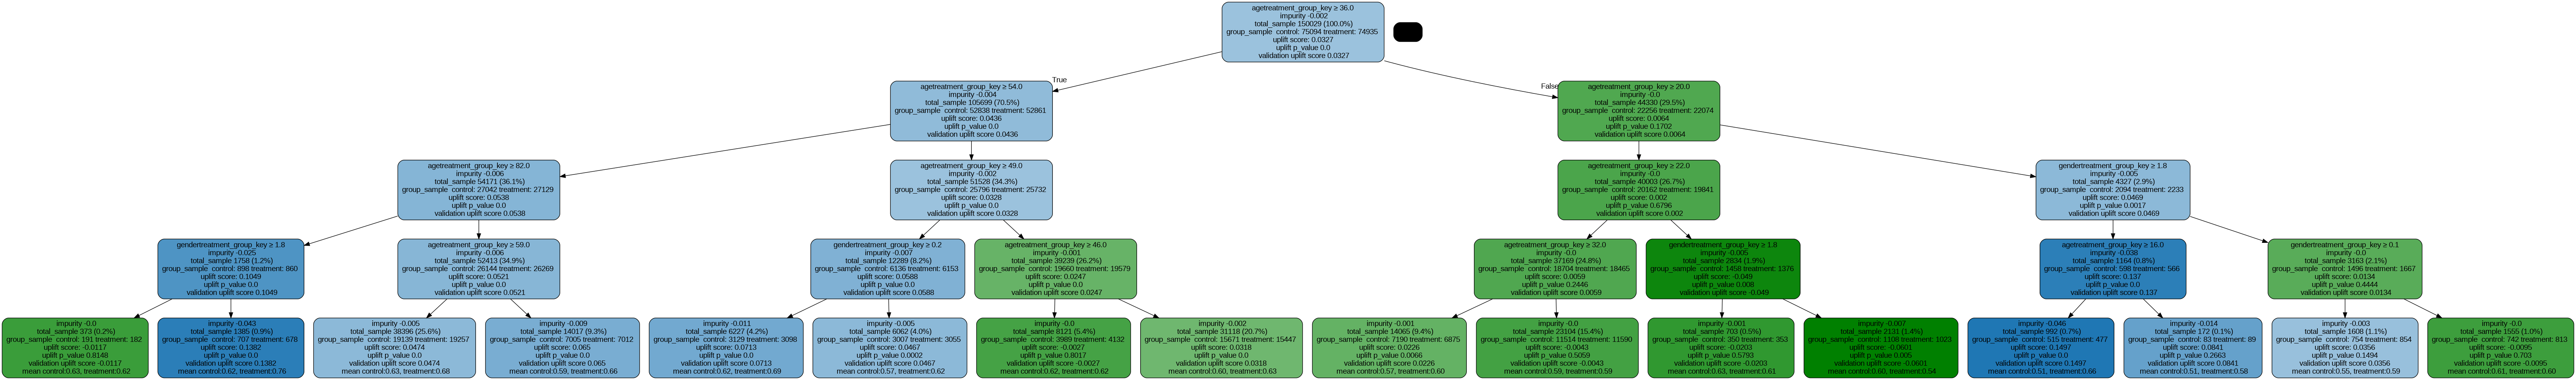

In [76]:
# Plot uplift tree
from IPython.display import Image
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree, X_train.columns)
Image(graph.create_png())